# Practical Data Science - 3rd Assignment

### Dimitris Tsirmpas

## Part 1: Organizing the Data

We begin by loading our data into a suitable pandas dataframe. They currently reside in arbitrarily named Excel, which are located each in its own directory, bearing the name of its annotator.

We will make a small script which will fetch each file, load it into a small dataframe and merge all said dataframes into one.

In [1]:
import os
from tqdm import tqdm # used only for progress bars
import pandas as pd

DIR = "hw2_submissions"
columns = ["text", "cluster", "annotator"]
df = pd.DataFrame(columns=columns)

for data_dir in tqdm(os.listdir(DIR), "Reading files"):
    # ignore generated files
    if not data_dir.startswith("."):
        # get the folder name
        full_dir = os.path.join(DIR, data_dir)
        # assume there is only one xlsx file in every dir, and fetch its name
        filename = list(filter(lambda x: x.endswith(".xlsx"), os.listdir(full_dir)))[0]
        # get the full relative path of the file
        full_filename = os.path.join(full_dir, filename)
        # read the file
        annot = pd.read_excel(full_filename, nrows=100)
        annot["annotator"] = data_dir
        
        df = pd.concat([df, annot], ignore_index=True)

df

Reading files: 100%|███████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 16.39it/s]


,text,cluster,annotator,Unnamed: 2,Unnamed: 3,2nd label,cluster id,secondary cluster,description
0,Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,1,f3352301,NaN,NaN,NaN,NaN,NaN,NaN
1,Τα 'θελες και τα 'παθες,3,f3352301,this would also suit cluster 1.,NaN,NaN,NaN,NaN,NaN
2,"Αδειανός μασκαράς, παραχέρ 'τ' χουριού",3,f3352301,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντ...",4,f3352301,NaN,NaN,NaN,NaN,NaN,NaN
4,"Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε",1,f3352301,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,"Σαράντα καλόγεροι, ο καθένας με τον πόνο τ'",4,f3352321,NaN,NaN,NaN,NaN,NaN,NaN
996,Θέλει κι ο Μούτσιος καφέ!,1,f3352321,NaN,NaN,NaN,NaN,NaN,NaN
997,Ξέρεις και συ που πάει του χωριού η αγγέλη,1,f3352321,NaN,NaN,NaN,NaN,NaN,NaN
998,Επήα να κόψω τ' αυτιά και 'βαλα και κέρατα,1,f3352321,NaN,NaN,NaN,NaN,NaN,NaN


Our job now is to clean up the data and organize them nicely in order to run whatever analysis we need on them. We can already spot some notable problems:

- Many columns are filled with no information
- The presence of the "cluster id" column is concerning, since it implies that someone has either renamed the "cluster" column or done something unorthodox with the cluster information
- The presence of "secondary" clusters and labels means that the annotation task may have been interepreted as fuzzy, and thus we may get lists of clusters instead of singular IDs

We can start our cleaning duty by checking for NULL values in the cluster column, which is by far the most important. 

In [2]:
df[df.cluster.isnull()]

,text,cluster,annotator,Unnamed: 2,Unnamed: 3,2nd label,cluster id,secondary cluster,description
376,Είχα το παιδί κι είχα τη χαρά κι έψηνα του πέν...,NaN,f3352310,1.0,NaN,NaN,NaN,NaN,NaN
377,Εσηκώθηκ' η Νοθιά με τα παιδογγονά τζη,NaN,f3352310,NaN,NaN,NaN,NaN,NaN,NaN
700,Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,NaN,f3352316,NaN,NaN,NaN,2.0,NaN,ignorance
701,Τα 'θελες και τα 'παθες,NaN,f3352316,NaN,NaN,NaN,9.0,NaN,idiocy and cleverness
702,"Αδειανός μασκαράς, παραχέρ 'τ' χουριού",NaN,f3352316,NaN,NaN,NaN,1.0,NaN,sadness
...,...,...,...,...,...,...,...,...,...
795,"Σαράντα καλόγεροι, ο καθένας με τον πόνο τ'",NaN,f3352316,NaN,NaN,NaN,2.0,6,ignorance
796,Θέλει κι ο Μούτσιος καφέ!,NaN,f3352316,NaN,NaN,NaN,50.0,NaN,unkwown
797,Ξέρεις και συ που πάει του χωριού η αγγέλη,NaN,f3352316,NaN,NaN,NaN,2.0,NaN,ignorance
798,Επήα να κόψω τ' αυτιά και 'βαλα και κέρατα,NaN,f3352316,NaN,NaN,NaN,18.0,NaN,expectations


This confirms our suspicions, annotator `f3352316` seems to have altered the cluster column name and thus our values are placed in the wrong dataframe column.

Thankfully, since we can see from the data files that each annotator submitted 100 data points, and since 102 rows have NULL values in them, the vast majority of our missing data can be fixed by merging the two columns for the particular annotator.

In [3]:
df.loc[df.annotator == "f3352316", "cluster"] = df.loc[df.annotator == "f3352316", "cluster id"] 
df[df.cluster.isnull()]

,text,cluster,annotator,Unnamed: 2,Unnamed: 3,2nd label,cluster id,secondary cluster,description
376,Είχα το παιδί κι είχα τη χαρά κι έψηνα του πέν...,NaN,f3352310,1.0,NaN,NaN,NaN,NaN,NaN
377,Εσηκώθηκ' η Νοθιά με τα παιδογγονά τζη,NaN,f3352310,NaN,NaN,NaN,NaN,NaN,NaN


The last two missing data points come from annotator `f3352310`. We will replace these missing data with a sentinel value in order to allow the numerical operations that will follow.

In [4]:
df.cluster = df.cluster.fillna(999)

The next step is to convert the cluster column to integers in order to ensure any method we use treats them as Nominal and not numerical.

Let's check if pandas did our work for us.

In [5]:
df.cluster.dtype

dtype('O')

Here, `dtype O` symbolizes Python objects, which means there are values in the column which could not be automatically converted to integers.

We can check with a simple regex match the values that aren't in Integer format.

In [6]:
# show rows where the cluster is not composed of only decimals
df[~df.cluster.apply(str).str.match("\d+$")]

,text,cluster,annotator,Unnamed: 2,Unnamed: 3,2nd label,cluster id,secondary cluster,description
300,Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,1.0,f3352310,NaN,NaN,NaN,NaN,NaN,NaN
301,Τα 'θελες και τα 'παθες,5.0,f3352310,NaN,NaN,NaN,NaN,NaN,NaN
302,"Αδειανός μασκαράς, παραχέρ 'τ' χουριού",1.0,f3352310,NaN,NaN,NaN,NaN,NaN,NaN
303,"Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντ...",1.0,f3352310,NaN,NaN,NaN,NaN,NaN,NaN
304,"Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε",2.0,f3352310,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
797,Ξέρεις και συ που πάει του χωριού η αγγέλη,2.0,f3352316,NaN,NaN,NaN,2.0,NaN,ignorance
798,Επήα να κόψω τ' αυτιά και 'βαλα και κέρατα,18.0,f3352316,NaN,NaN,NaN,18.0,NaN,expectations
799,Απού βράσει τζαί στεγνώσει εν έν τίποτε,18.0,f3352316,NaN,NaN,NaN,18.0,NaN,expectations
816,Το μήλο θα πέση κάτ' α' τη μηλιά,"2, 3",f3352318,NaN,NaN,NaN,NaN,NaN,NaN


Most of the matches are made up of floats, which will be automatically converted to integers. Of note however are the last two data points which imply the existence of cluster id lists inside our data. That's another suspiction unfortunately confirmed.

We can filter the data points as follows:

In [7]:
fuzzies = df.cluster.apply(str).str.contains(",")
df[fuzzies]

,text,cluster,annotator,Unnamed: 2,Unnamed: 3,2nd label,cluster id,secondary cluster,description
816,Το μήλο θα πέση κάτ' α' τη μηλιά,"2, 3",f3352318,NaN,NaN,NaN,NaN,NaN,NaN
838,Όποιος συχνα σκουντάβγει συχνα και μεταννοιώνει,"3, 4",f3352318,NaN,NaN,NaN,NaN,NaN,NaN


There are many ways to deal with these points. We could for example:
- duplicate their rows and assign each cluster id to a new row
- make a second cluster column
- discard one of the values

Since these points represent a tiny part of our dataset (2 out of 1000), and don't carry important information, we choose to simply keep the first one.

In [8]:
df.loc[fuzzies, "cluster"] = df[fuzzies].cluster.apply(lambda x: x.split(",")[0])

We can now finally mark the cluster column as Nominal data.

In [9]:
df.cluster = df.cluster.astype(int)
df.cluster.dtype

dtype('int32')

And to finish organizing our dataset, we can leave only the relevant columns and set the proverb text as the index.

In [10]:
df = df[columns]
df = df.set_index("text")
df

,cluster,annotator
text,,
Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,1,f3352301
Τα 'θελες και τα 'παθες,3,f3352301
"Αδειανός μασκαράς, παραχέρ 'τ' χουριού",3,f3352301
"Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντάρι ψόφιο, χαρτί μουρδουλωμένο",4,f3352301
"Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε",1,f3352301
...,...,...
"Σαράντα καλόγεροι, ο καθένας με τον πόνο τ'",4,f3352321
Θέλει κι ο Μούτσιος καφέ!,1,f3352321
Ξέρεις και συ που πάει του χωριού η αγγέλη,1,f3352321


## Part 2: Investigating Annotator Agreement

What we would like to do now, is investigate the pairwise agreement between different annotators. In other words, we want to investigate which annotators generally agreed with each other when they classified the same 100 points.

### Caveats

Before we begin, we must acknowledge some basic facts and expectations.

- The annotators did not have a set number of clusters
- The annotators chose the clusters and their meanings by themselves

These two facts mean the annotated clusters should have minimal depedence between annotators. The labels are inherenerntly arbitrary, and the annotators don't have anything common to start their work from. Our expectation going into this is that, aside from the first few clusters (given that we can assume many annotators assigned clusters serially), there should be no statistically significant agreement between them.

### Methodology

We get all possible combinations between our annotators and calculate the pairwise percent agreement between their cluster IDs:

In [11]:
import numpy as np
from itertools import combinations

comparisons = []

# get all combinations between annotators
annotators = set(df.annotator)
pairwise_annotators = combinations(annotators, 2)

# sort the dataframe w.r.t the text, to ensure the compared columns have a 1-1 relationship 
sorted_df = df.sort_values(by=["text"], axis="index")

for a1, a2 in list(filter(lambda x: x[0] != x[1], pairwise_annotators)):
    # percent agreement between the two annotators
    k = np.mean(sorted_df[sorted_df.annotator==a1].cluster.values == sorted_df[sorted_df.annotator==a2].cluster.values)
    comparisons.append((a1, a2, k))
    
comp_df = pd.DataFrame(comparisons, columns=["annotator1", "annotator2", "agreement"])
comp_df.head()

,annotator1,annotator2,agreement
0,f3352314,f3352301,0.18
1,f3352314,f3352307,0.04
2,f3352314,f3352315,0.08
3,f3352314,f3352316,0.14
4,f3352314,f3352321,0.21


We can now sort our dataframe by the `agreement` column to get the annotators with the biggest agreement:

In [12]:
sorted_comp_df = comp_df.sort_values("agreement", ascending=False)
sorted_comp_df.head()

,annotator1,annotator2,agreement
36,f3352321,f3352310,0.49
35,f3352321,f3352308,0.29
39,f3352308,f3352310,0.27
12,f3352301,f3352321,0.24
4,f3352314,f3352321,0.21


And to get a better view of our results as a whole, to get some brief statistics and plot their distribution:

In [13]:
comp_df.agreement.describe()

count    45.000000
mean      0.101778
std       0.088633
min       0.010000
25%       0.040000
50%       0.080000
75%       0.130000
max       0.490000
Name: agreement, dtype: float64

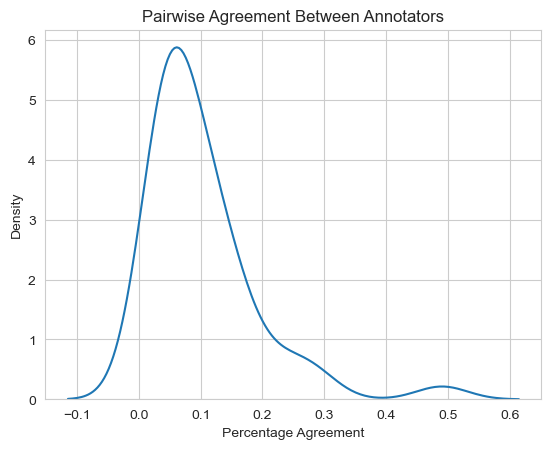

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
ax = sns.kdeplot(comp_df.agreement)
ax.set(xlabel="Percentage Agreement", title="Pairwise Agreement Between Annotators")
plt.show()

### Investigating the Anomaly

From the plot and our statistics we can note the following:
- The data follows rougly the Normal Distribution with mean 0.1. This means that the vast majority of annotators agreed only on 10% of their labels with each other. This was to be expected, since most annotators used 10 randomly assigned clusters.
- The distribution is slightly right skewed, implying some interesting coincidences leading to higher-than-average agreement. This could be explained by the serial cluster hypothesis however.
- There is a very clear outlier, where two annotators managed to get almost 50% agreement with their data. This requires investigation.

We can build a hierarchical dataframe, which will allow us to better review the comparison between the two annotators.

In [15]:
df[(df.annotator == sorted_comp_df.iloc[0][0]) | (df.annotator == sorted_comp_df.iloc[0][1])] \
                                                .reset_index() \
                                                .set_index(["text", "annotator"]) \
                                                .sort_index()\
                                                .head(30)

cluster
text                                               annotator         
-Θώριε στραβέ. Λέει -Θώριε, Θεέ                    f3352310         3
                                                   f3352321         4
Άη μου Νικόλα, και σώσε με. Λέει, Και σάλεβγε κ... f3352310         3
                                                   f3352321         4
Άλλος κούκος λαλεί                                 f3352310         5
                                                   f3352321         1
Άνθρωπος ακάλεστος στογ γάμοσ σαν τογ γάδαρον      f3352310         5
                                                   f3352321         5
Άντρα μου, η ξύξες σου τρέχουσι(ν), - Είνε γενα... f3352310         5
                                                   f3352321         1
Άρπαξέ με τζαί να σ' αρπάξω                        f3352310         3
                                                   f3352321         1
Άφσ' τσου πλούσους να σωδιάζουν για τη φτώχεια ... f3352310         2
                                                   f3352321         2
Έργατα και δουλείας                                f3352310         1
                                                   f3352321         1
Όποιο δάχτυλο να κόψω, πονεί                       f3352310         1
                                                   f3352321         1
Όποιος 'ς το κόσμο δε γλεντά και το κρασί δεν π... f3352310         1
                                                   f3352321         2
Όποιος έχει σειέται κι όπου δεν έχει ξυέται        f3352310         5
                                                   f3352321         1
Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει            f3352310         1
                                                   f3352321         1
Όποιος πειναει για να πλουτήση, μόν' η πείνα θα... f3352310         2
                                                   f3352321         2
Όποιος συχνα σκουντάβγει συχνα και μεταννοιώνει    f3352310         1
                                                   f3352321         2
Όπου ακούσης μέγα τρύγος, παίρνε μικρό καλάθι      f3352310         2
                                                   f3352321         2

By having a look at the cluster labels for both annotators, we can conclude they are indeed relatively indepedent for each other, featuring differing sizes and meanings for each ID.

What seems to link these two annotators are very frequently-used labels (most of which can already be identified from the sample above) which were assigned roughly the same general meaning. Thus, a few labels led to an almost 50% agreement between the annotators.

We can confirm this hypothesis by plotting the distribution of the cluster IDs for each annotator.

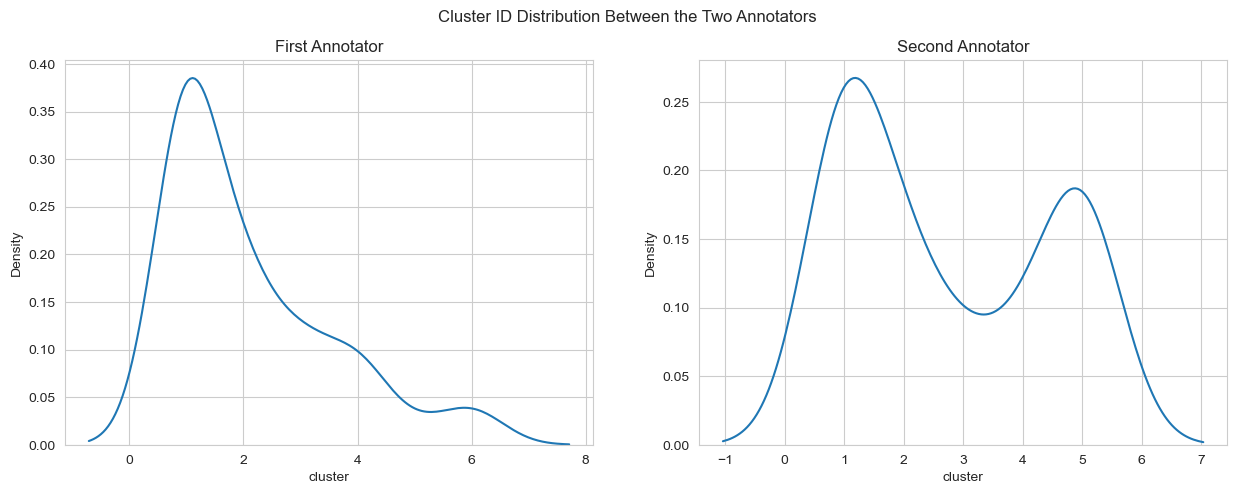

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Cluster ID Distribution Between the Two Annotators")

cluster1 = df[(df.annotator == sorted_comp_df.iloc[0][0])].cluster.apply(lambda x: x if x!=999 else None)
sns.kdeplot(cluster1, ax=ax1)
ax1.set_title("First Annotator")

cluster2 = df[(df.annotator == sorted_comp_df.iloc[0][1])].cluster.apply(lambda x: x if x!=999 else None)
sns.kdeplot(cluster2, ax=ax2)
ax2.set_title("Second Annotator")

plt.show()